# Pré-processamento dos dados

É de notar que aquilo que é a classificação de uma galáxia está expresso na coluna ```subclass```.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

Retiremos colunas irrelevantes:

In [2]:
galaxy_data = pd.read_csv("data/data.csv", header = 1) # header 1 para ignorar a primeira linha

del galaxy_data['objid']
del galaxy_data['class'] # sempre GALAXY
del galaxy_data['specobjid']

In [3]:
galaxy_data.describe()

,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,98.845058,175.621855,...,18.834259,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.116753,0.000179
std,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,229.479215,435.852215,...,105.079620,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.100169,0.052189
min,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,-42.440640,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000002
25%,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,...,19.257783,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.055836,0.000008
50%,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,...,19.763915,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.085850,0.000011
75%,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,...,20.408775,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,0.135148,0.000015
max,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,18668.400000,31755.990000,...,26.174400,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,0.572899,16.503710


Podemos constatar que há várias colunas que contêm o valor -9999, o que parece inválido. Eliminemos as linhas onde tal valor figure.

In [4]:
galaxy_data = galaxy_data.loc[~(galaxy_data == -9999).any(axis=1)]
galaxy_data.describe()

,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,...,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000,97478.000000
mean,180.871384,23.408281,19.535651,18.286963,17.653960,17.295507,17.076613,31.280862,100.691635,178.805716,...,19.885111,18.974685,18.686195,0.502952,0.581536,0.593237,0.592267,0.564087,0.113784,0.000183
std,75.521237,21.139379,1.414031,1.467872,1.455235,1.478748,1.515657,77.026785,229.895755,436.330953,...,1.010839,1.047592,1.079401,0.249706,0.231337,0.223864,0.224363,0.236591,0.096034,0.052860
min,0.008745,-11.244273,12.753830,11.822230,11.245440,10.711590,10.255130,-26.503830,-1.549572,-2.374534,...,15.495690,14.730110,14.304590,0.050000,0.050000,0.050000,0.050000,0.050000,-0.000833,0.000002
25%,139.186151,3.096875,18.745285,17.489463,16.882508,16.510883,16.263535,9.974552,36.952790,72.081635,...,19.244823,18.282073,17.977782,0.312424,0.403996,0.422141,0.421844,0.388564,0.055660,0.000008
50%,181.727246,20.678307,19.326030,18.052690,17.441320,17.072225,16.841180,18.602125,60.106555,105.553050,...,19.742110,18.822060,18.537410,0.515580,0.592218,0.607269,0.606766,0.579339,0.085263,0.000010
75%,223.893171,42.135652,20.002553,18.580872,17.855435,17.519850,17.368462,31.759725,100.975275,176.602175,...,20.344170,19.515025,19.235130,0.700799,0.770523,0.775138,0.774166,0.755234,0.132940,0.000015
max,359.997922,68.695258,30.327660,28.207960,28.045800,25.092310,24.140990,7915.306000,18668.400000,31755.990000,...,25.456670,24.362560,23.435990,1.000000,1.000000,0.999999,1.000000,0.999998,0.572899,16.503710


In [5]:
galaxy_data.isna().sum().sum()

0

Constatamos que não existem valores nulos em todo o ficheiro de dados.

In [6]:
galaxy_data.duplicated().any()

False

E, ainda, que não existem linhas duplicadas.

Verifiquemos agora se existem erros ortográficos em alguma das linhas, no campo subclasse.

In [7]:
galaxy_data['subclass'].unique()

array(['STARFORMING', 'STARBURST'], dtype=object)

Constata-se que não há gralhas no campo de subclasse.

Agora, passamos à fase de deteção de _outliers_. A presença de _outliers_ numa dada _feature_ pode indicar erros nos dados. Para o efeito, geremos, para cada _feature_ um diagrama de caixa e bigodes, com distinção da classe onde se insere o objeto a que cada valor corresponde.

ra


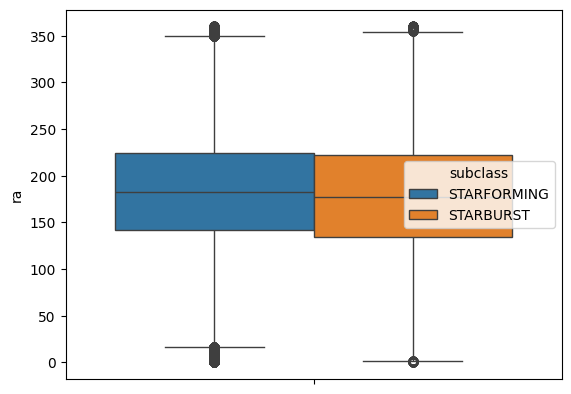

dec


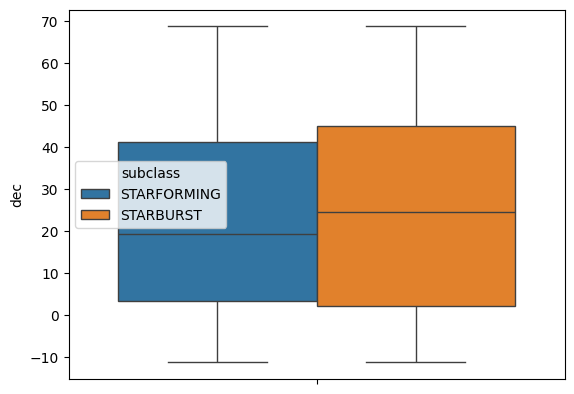

u


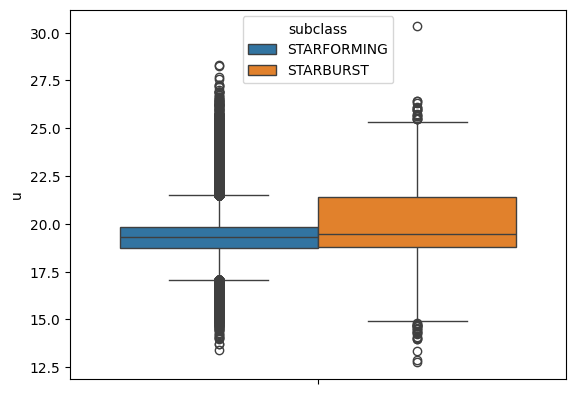

g


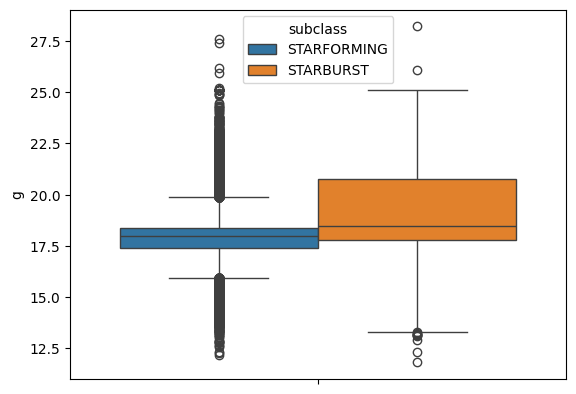

r


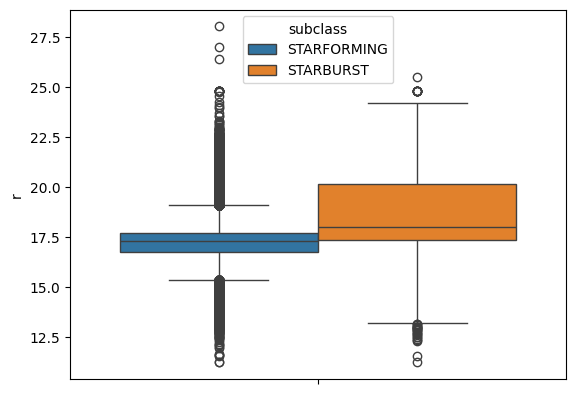

i


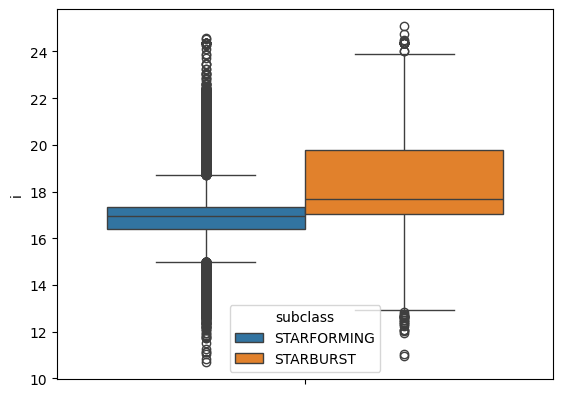

z


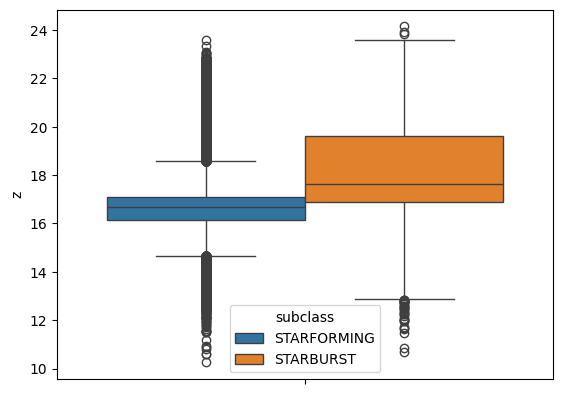

modelFlux_u


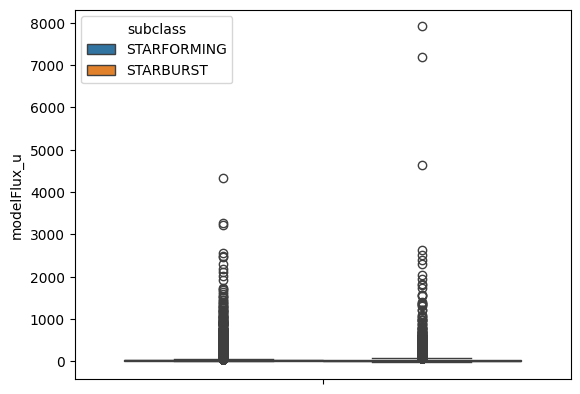

modelFlux_g


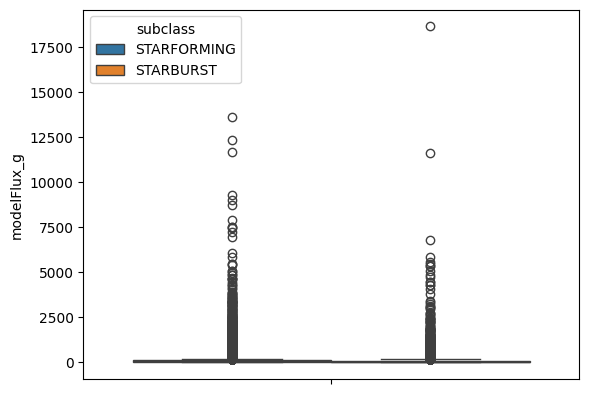

modelFlux_r


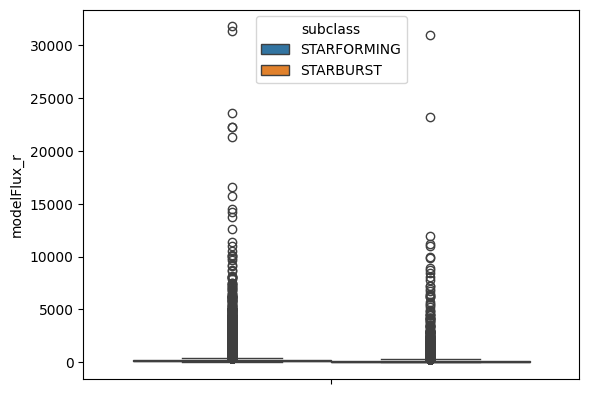

modelFlux_i


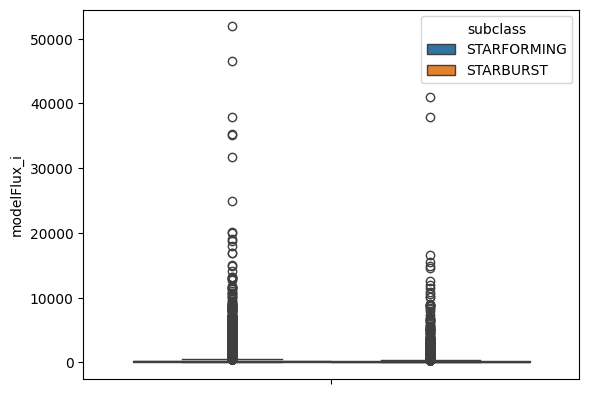

modelFlux_z


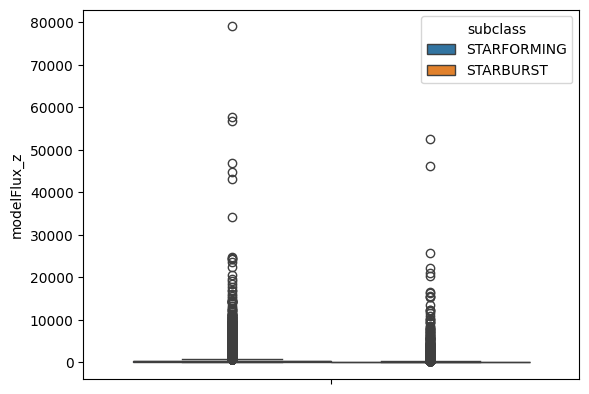

petroRad_u


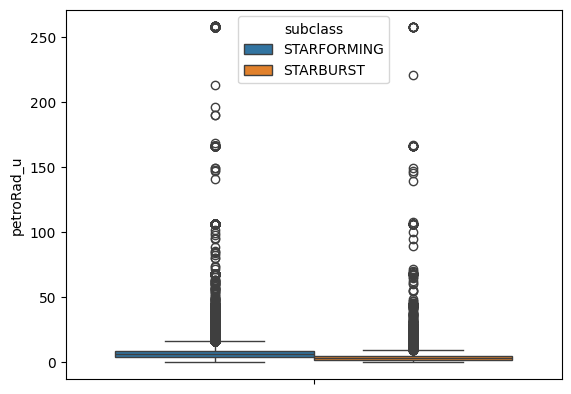

petroRad_g


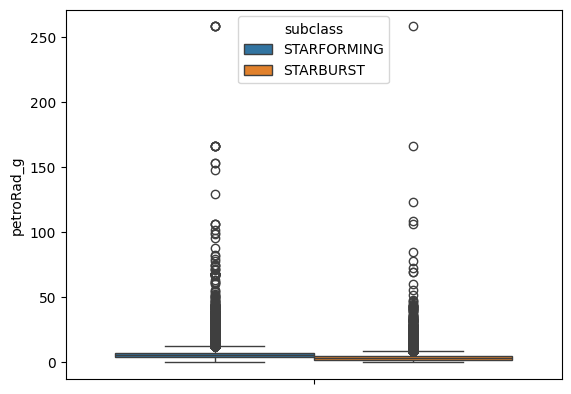

petroRad_i


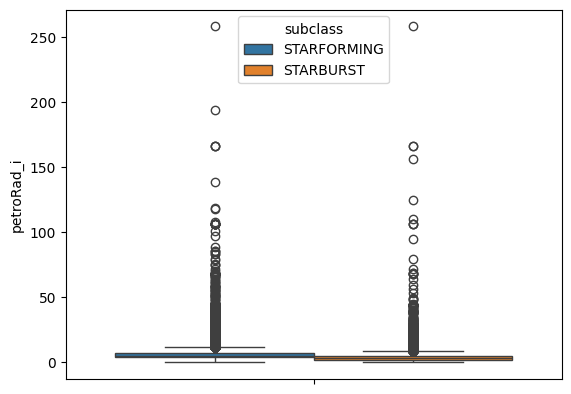

petroRad_r


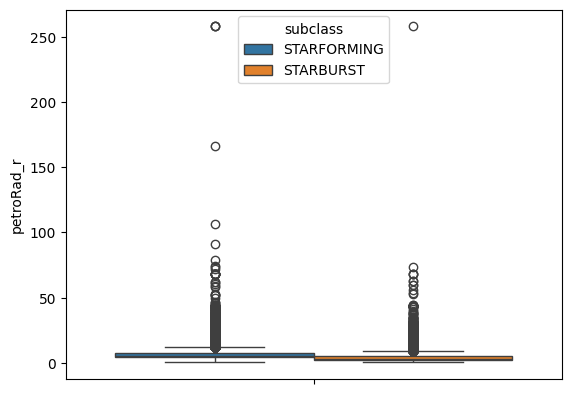

petroRad_z


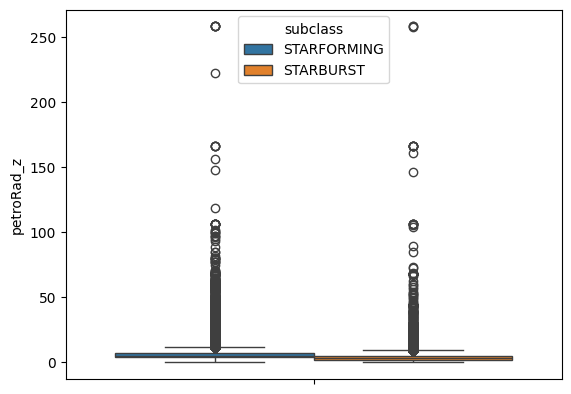

petroFlux_u


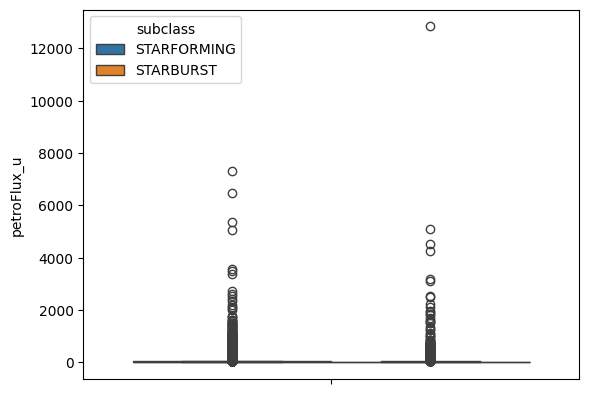

petroFlux_g


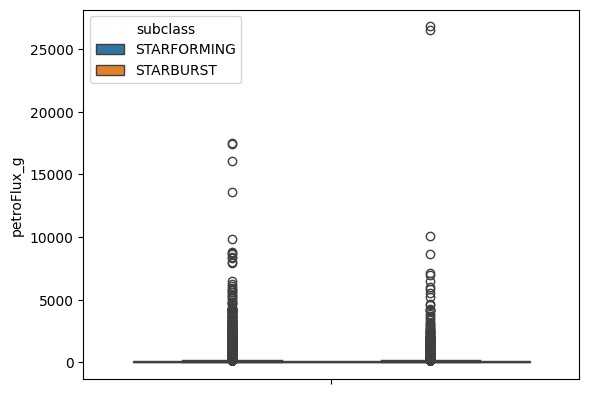

petroFlux_i


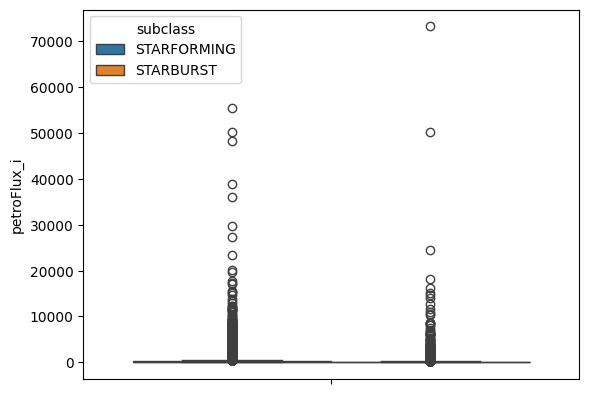

petroFlux_r


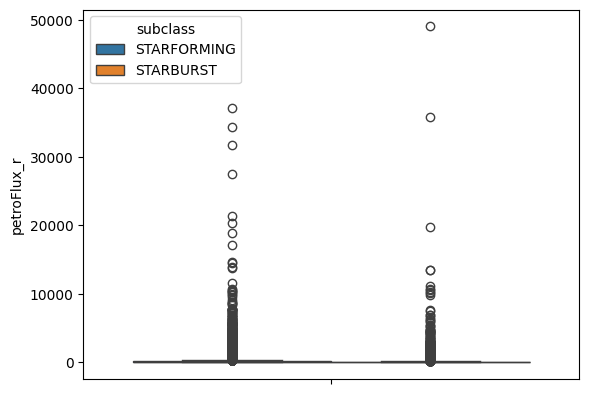

petroFlux_z


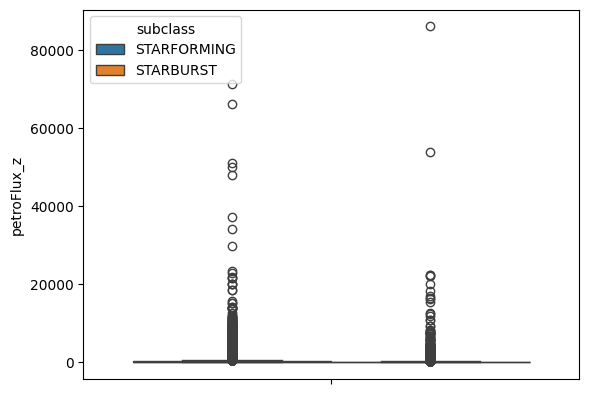

petroR50_u


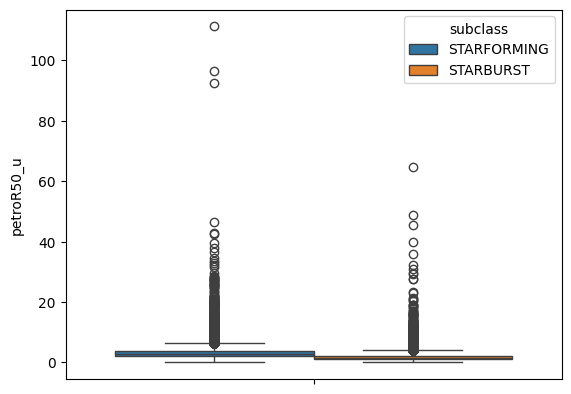

petroR50_g


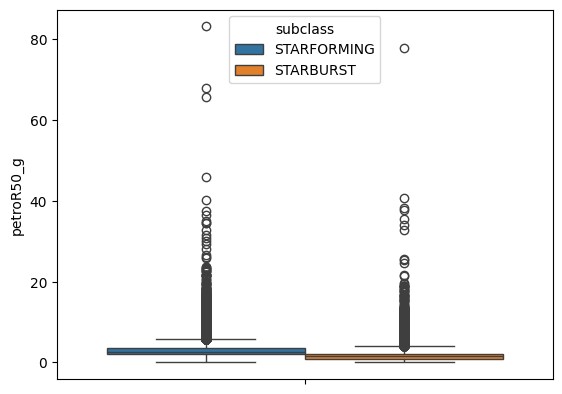

petroR50_i


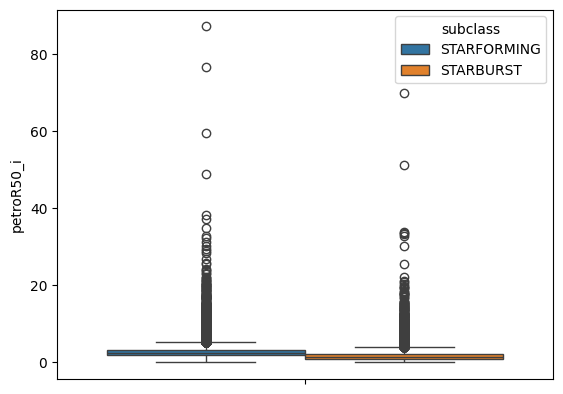

petroR50_r


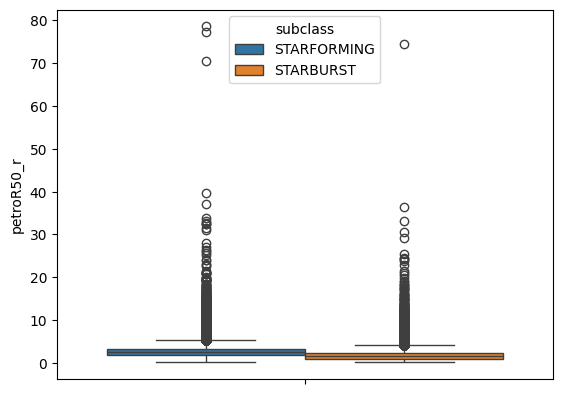

petroR50_z


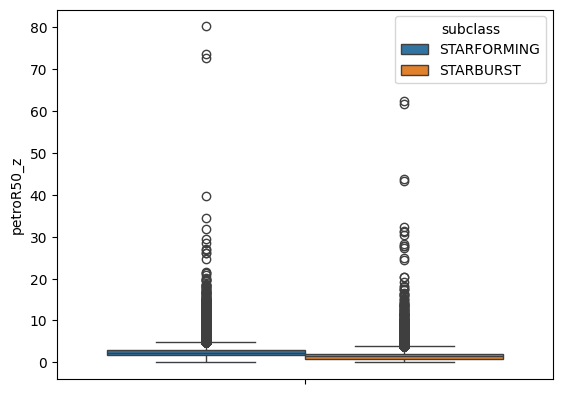

psfMag_u


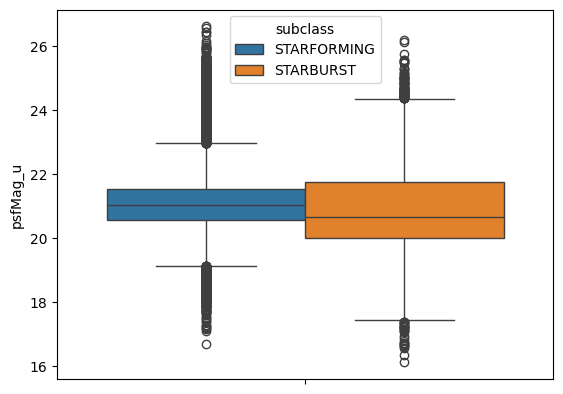

psfMag_r


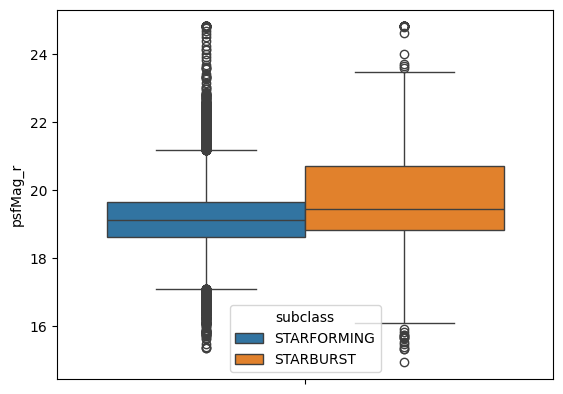

psfMag_g


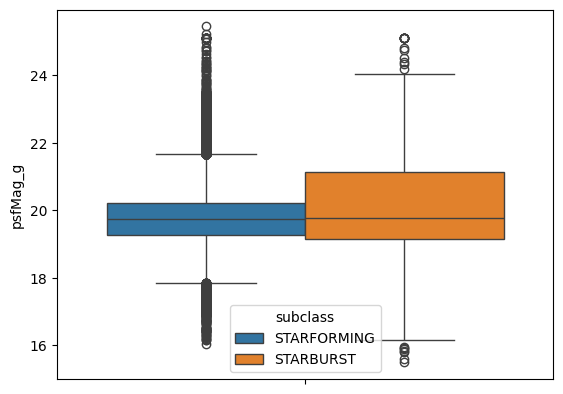

psfMag_i


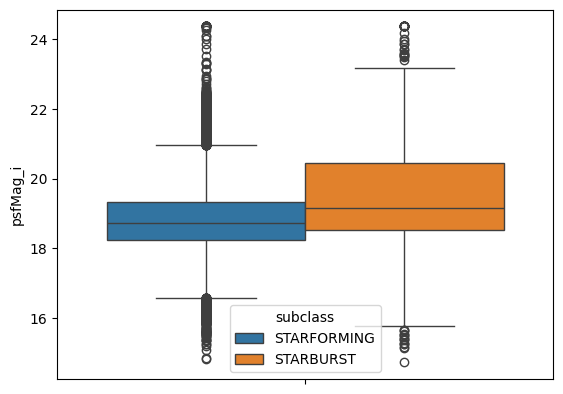

psfMag_z


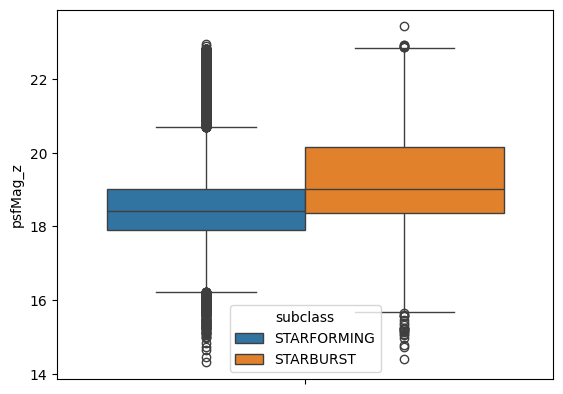

expAB_u


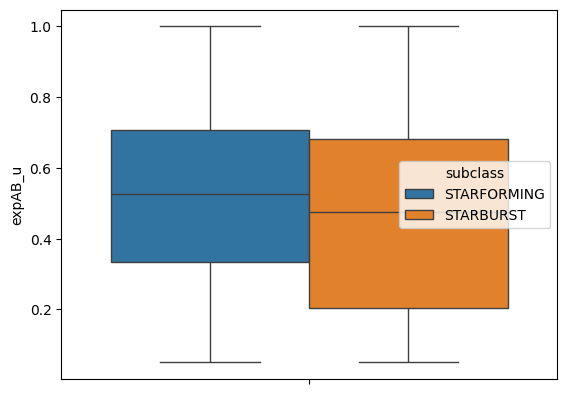

expAB_g


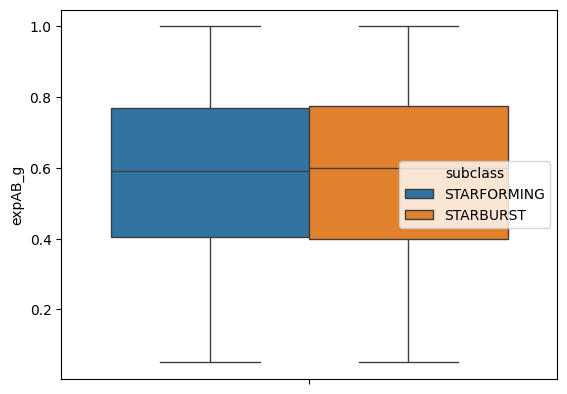

expAB_r


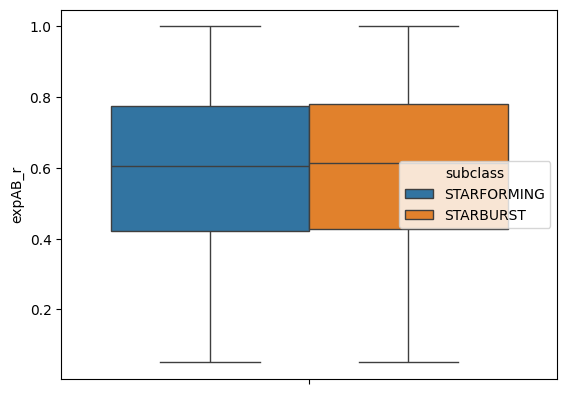

expAB_i


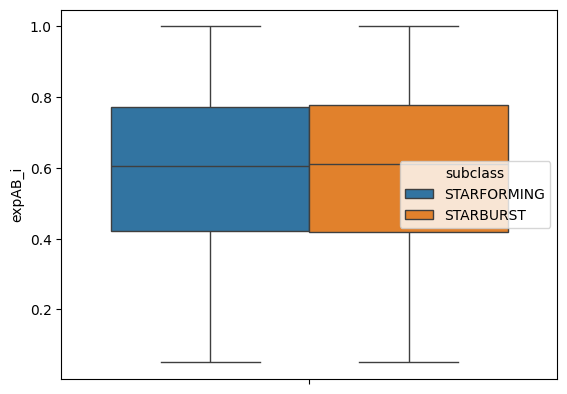

expAB_z


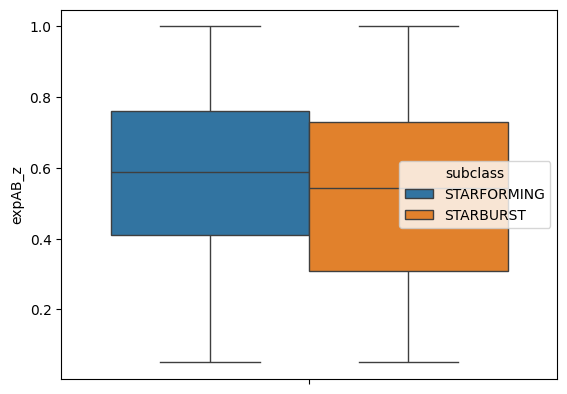

redshift


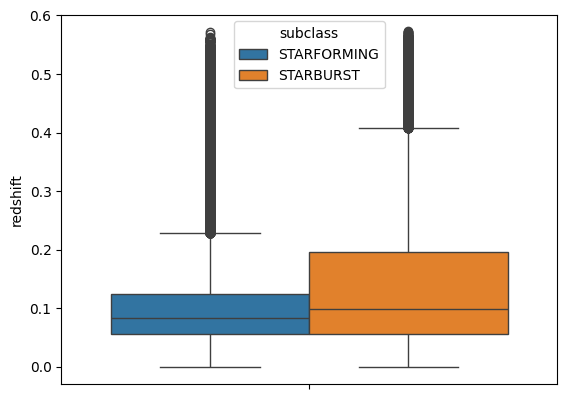

redshift_err


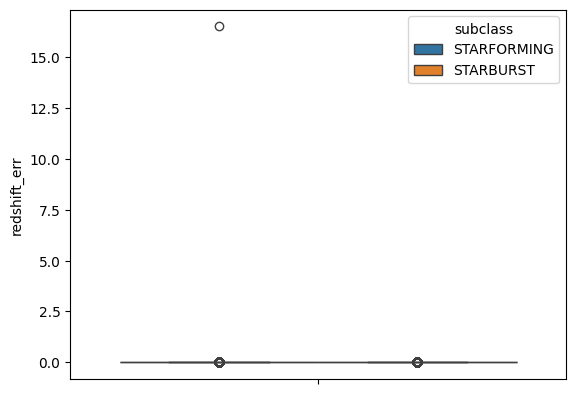

In [8]:
%matplotlib inline

for col_index, column in enumerate(galaxy_data.columns):
    if column == 'subclass':
        continue

    plot = sb.boxplot(
        data=galaxy_data,
        y=column,
        hue="subclass"
    )
    print(column)
    plt.show()

Valores muito elevados na coluna ```redshift_err``` fazem duvidar da fiabilidade dos valores das linhas em causa. Assim sendo, eliminemos as linhas em que o valor na referida coluna seja superior a 1.

In [9]:
print(f"Total linhas antes: {len(galaxy_data)}")
galaxy_data = galaxy_data[galaxy_data['redshift_err'] <= 1]
print(f"Total linhas depois: {len(galaxy_data)}")

Total linhas antes: 97478
Total linhas depois: 97477


Apenas se perdeu um objeto com o processo.

Ainda, observamos o total relativo de ocorrências de cada subclasse:

In [10]:
print(galaxy_data['subclass'].value_counts(normalize=True))

subclass
STARFORMING    0.754198
STARBURST      0.245802
Name: proportion, dtype: float64


Como se pode constatar, há um grande desequilíbrio entre as ocorrências das duas sub-classes. Tal deverá ser tido em conta na escolha de conjuntos de treino na hora de treinar os modelos de classificação.

Geremos agora uma matriz de correlação entre as várias _features_, de modo a concluir se algumas delas poderão ser fundidas.

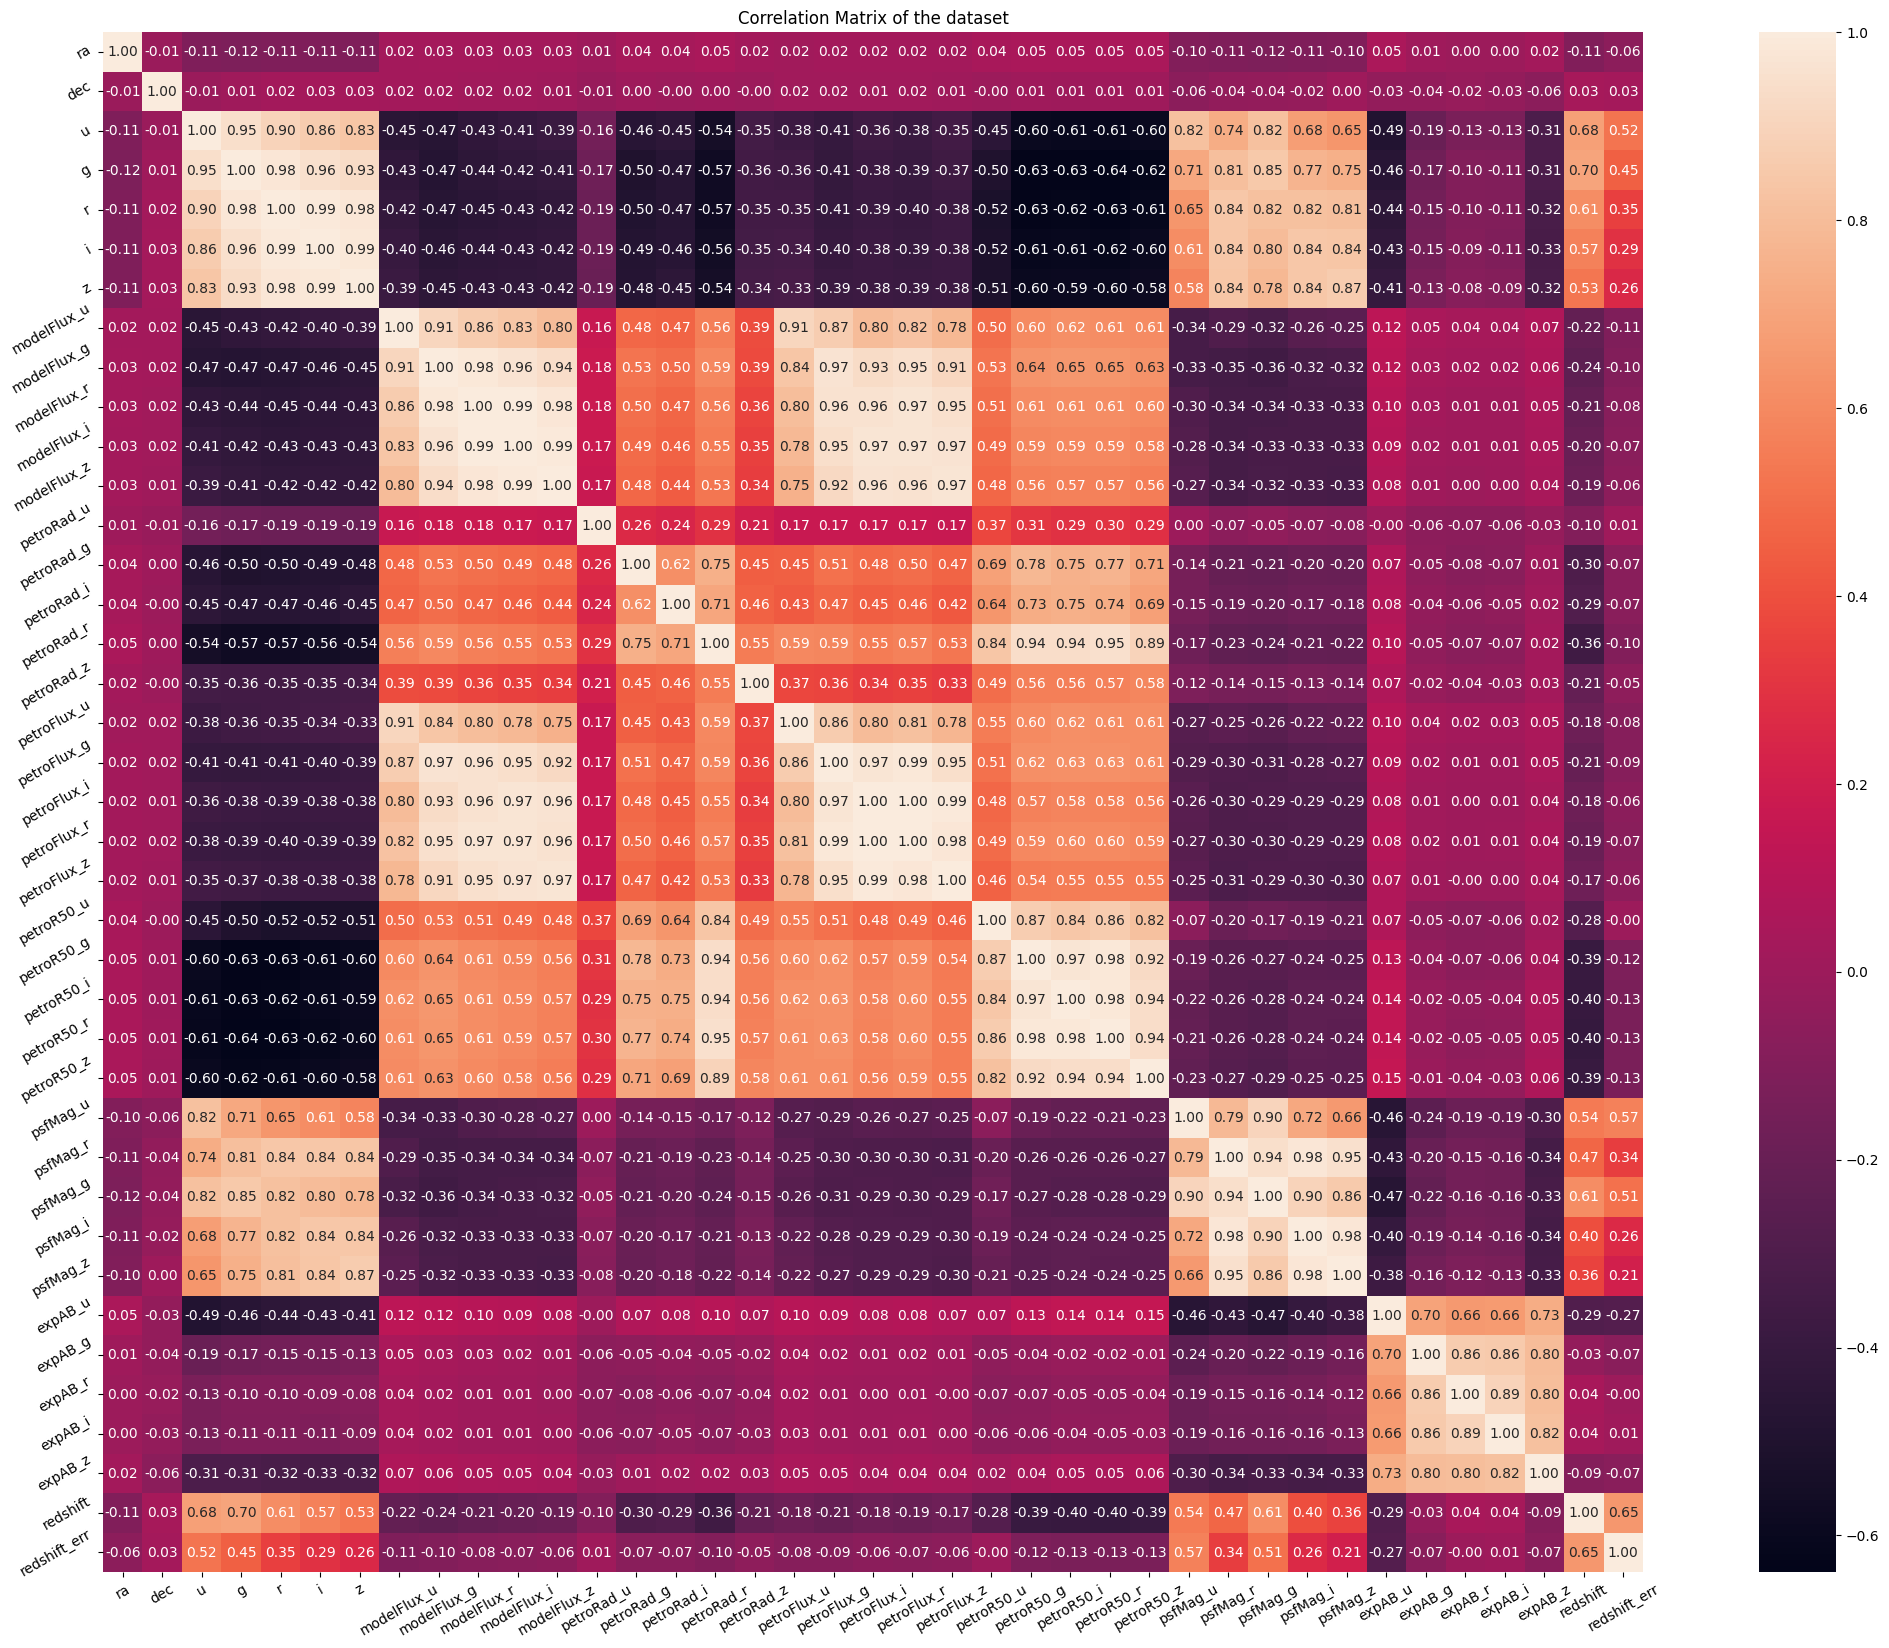

In [11]:
# make the correlation matrix of the attributes
correlation_matrix = galaxy_data.drop(columns=['subclass']).corr()

# make a heatmap of the correlation matrix
plt.figure(figsize=(30,20))
plt.title('Correlation Matrix of the dataset')
heatmap = sb.heatmap(correlation_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)

# save the figure with a higher resolution
plt.savefig("images_preprocessing/correlation_matrix.svg", format="svg")
plt.savefig("images_preprocessing/correlation_matrix.png", format="png")

# display the plot
plt.show()

Através da matriz de correlações acima, torna-se evidente que há grande correlação entre as _features_ terminadas em ```g```, ```r```, ```i``` e ```z```. Por exemplo, entre as _features_ ```modelFlux_g```, ```modelFlux_r```, ```modelFlux_i``` e ```modelFlux_z```, temos coeficientes de correlação entre 0,94 e 1. Assim, agreguemo-las pela sua média.

In [12]:
galaxy_data.insert(galaxy_data.columns.get_loc('u') + 1, 'modelMag_mean', galaxy_data.loc[:, 'g':'z'].mean(axis=1))
galaxy_data.insert(galaxy_data.columns.get_loc('modelFlux_u') + 1, 'modelFlux_mean', galaxy_data.loc[:, 'modelFlux_g':'modelFlux_z'].mean(axis=1))
galaxy_data.insert(galaxy_data.columns.get_loc('petroFlux_u') + 1, 'petroFlux_mean', galaxy_data.loc[:, 'petroFlux_g':'petroFlux_z'].mean(axis=1))
galaxy_data.insert(galaxy_data.columns.get_loc('petroR50_u') + 1, 'petroR50_mean', galaxy_data.loc[:, 'petroR50_g':'petroR50_z'].mean(axis=1))
galaxy_data.insert(galaxy_data.columns.get_loc('psfMag_u') + 1, 'psfMag_mean', galaxy_data.loc[:, 'psfMag_g':'psfMag_z'].mean(axis=1))
galaxy_data.drop(columns=['g', 'r', 'i', 'z'], inplace=True)
galaxy_data.drop(columns=['modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z'], inplace=True)
galaxy_data.drop(columns=['petroFlux_g', 'petroFlux_r', 'petroFlux_i', 'petroFlux_z'], inplace=True)
galaxy_data.drop(columns=['petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z'], inplace=True)
galaxy_data.drop(columns=['psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z'], inplace=True)
galaxy_data.columns


Index(['ra', 'dec', 'u', 'modelMag_mean', 'modelFlux_u', 'modelFlux_mean',
       'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z',
       'petroFlux_u', 'petroFlux_mean', 'petroR50_u', 'petroR50_mean',
       'psfMag_u', 'psfMag_mean', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i',
       'expAB_z', 'subclass', 'redshift', 'redshift_err'],
      dtype='object')

Finalizamos com a exportação dos dados, agora "limpos", para um novo ficheiro.

In [13]:
galaxy_data.to_csv("data/clean_data.csv", index=False)

## Dados normalizados

Ainda, levamos a cabo o processo de normalização dos dados, i.e., para uma dada _feature_, cada valor $x $ passa a<br>$x' = (x - \overline{x})/s $.

Para o efeito, contamos com a classe `StandardScaler`, oferecida na biblioteca de pré-processamento do scikit-learn.

Uma vez que o conceito de normalização apenas tem cabimento ao tratar de dados quantitativos, há que, numa fase inicial, "deixar cair" a única _feature_ não-numérica, para que o método a usar proceda à normalização, a seguir à qual se volta a juntar, então, a coluna qualitativa.

In [14]:
galaxy_data.reset_index(inplace=True, drop=True)
scaler = StandardScaler()

filtered = deepcopy(galaxy_data)
del filtered['subclass']

scaler.fit(filtered.values)
galaxy_data_normalized = scaler.transform(filtered.values)

galaxy_data_normalized = pd.DataFrame(galaxy_data_normalized, columns = filtered.columns)
galaxy_data_normalized.insert(galaxy_data_normalized.columns.get_loc('expAB_z') + 1, 'subclass', galaxy_data['subclass'].values)

Para verificar que a coluna 'subclass' foi reposta corretamente:

In [15]:
x = galaxy_data_normalized.loc[galaxy_data_normalized['subclass'] == 'STARBURST'].index
y = galaxy_data.loc[galaxy_data['subclass'] == 'STARBURST'].index

print((x == y).all())

True


In [16]:
galaxy_data_normalized.describe()

,ra,dec,u,modelMag_mean,modelFlux_u,modelFlux_mean,petroRad_u,petroRad_g,petroRad_i,petroRad_r,...,petroR50_mean,psfMag_u,psfMag_mean,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,...,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04,9.747700e+04
mean,2.580425e-16,7.231023e-17,-9.630672e-16,1.002138e-15,-5.977257e-17,4.373602e-19,1.864612e-16,-1.243561e-16,-7.114393e-17,-7.012343e-17,...,-3.586354e-17,-2.057634e-15,-5.474292e-17,-2.565847e-17,-1.641559e-16,-3.337059e-16,-2.676645e-16,-4.214695e-16,7.099815e-17,-1.361648e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.394859e+00,-1.639241e+00,-4.796097e+00,-4.434678e+00,-7.501906e-01,-4.030243e-01,-5.941748e-01,-1.216314e+00,-1.201069e+00,-1.311974e+00,...,-1.469999e+00,-4.952804e+00,-4.244463e+00,-1.813942e+00,-2.297670e+00,-2.426639e+00,-2.416918e+00,-2.172891e+00,-1.193506e+00,-9.821234e-01
25%,-5.519718e-01,-9.608371e-01,-5.589524e-01,-5.329572e-01,-2.766111e-01,-2.432563e-01,-3.405330e-01,-4.883663e-01,-4.614783e-01,-5.168539e-01,...,-5.572061e-01,-6.161597e-01,-6.498106e-01,-7.630156e-01,-7.674731e-01,-7.642893e-01,-7.595876e-01,-7.418791e-01,-6.052467e-01,-5.080480e-01
50%,1.135141e-02,-1.292124e-01,-1.482327e-01,-1.481963e-01,-1.646069e-01,-1.650187e-01,-1.941721e-01,-1.591483e-01,-1.707329e-01,-1.695330e-01,...,-1.685660e-01,-6.504971e-02,-1.487807e-01,5.055301e-02,4.615348e-02,6.266931e-02,6.462140e-02,6.445930e-02,-2.970140e-01,-2.799458e-01
75%,5.696710e-01,8.859064e-01,3.301942e-01,1.370551e-01,6.217979e-03,-2.244792e-03,1.240544e-02,2.451061e-01,2.121240e-01,2.691297e-01,...,3.246458e-01,5.237221e-01,4.962696e-01,7.923308e-01,8.169437e-01,8.125675e-01,8.107483e-01,8.078808e-01,1.994674e-01,1.189527e-01
max,2.371869e+00,2.142305e+00,7.632090e+00,4.582354e+00,1.023543e+02,8.390422e+01,1.835922e+01,5.347377e+01,5.435305e+01,6.106904e+01,...,4.817308e+01,5.595354e+00,4.850521e+00,1.990553e+00,1.808905e+00,1.817018e+00,1.817301e+00,1.842487e+00,4.780787e+00,1.580517e+01


O resumo estatístico acima permite, então, confirmar o efeito da normalização.

Por último, gravemos, então, os dados normalizados num novo ficheiro:

In [17]:
galaxy_data_normalized.to_csv("data/clean_data_normalized.csv", index=False)